# Import Dependencies

In [1]:
import pandas as pd
from sqlalchemy import create_engine
# from sqlalchemy.ext.declarative import declarative_base
# Base = declarative_base()

# from sqlalchemy.orm import Session

# from sqlalchemy import Column, Integer, String, Float

import matplotlib.pyplot as plt
from config import postgre

# Create Connection

In [2]:
# variables to populate the database connection string
db_user = 'postgres'
db_password = postgre
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "SQLhomework_db"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

connection = engine.connect()

In [3]:
#Import Salaries table
joined_table = pd.read_sql('SELECT s.salary, t.title FROM "Salaries" as s INNER JOIN "Employees" as e ON s.emp_no = e.emp_no INNER JOIN "Titles" as t ON t.title_id = e.emp_title', connection)

# joined_table.head(25)
joined_table["title"].value_counts()

Staff                 107384
Senior Engineer        97747
Engineer               47303
Senior Staff           26583
Technique Leader       15148
Assistant Engineer      5835
Manager                   24
Name: title, dtype: int64

Text(0.5, 1.0, 'Frequency of Salaries per Employees')

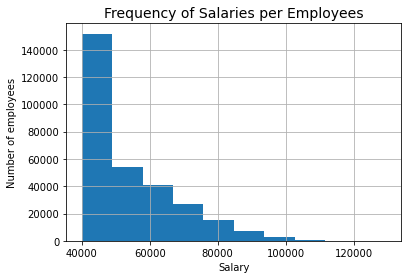

In [17]:
joined_table.hist(column='salary')
plt.xlabel("Salary")
plt.ylabel("Number of employees")
plt.title("Frequency of Salaries per Employees",size=14)

In [8]:
groupedby_title = joined_table.groupby(["title"])["salary"].mean()
groupedby_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0.5, 1.0, 'Average Salary per Job Title')

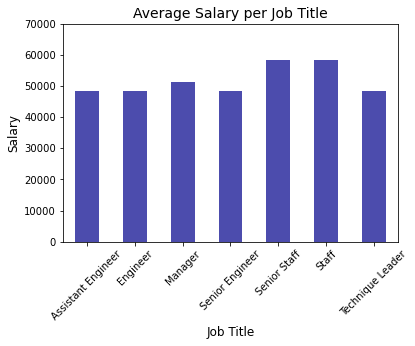

In [16]:
groupedby_title.plot.bar(color="darkblue", alpha=0.7, rot=45)
plt.ylim(0,70000)
plt.xlabel("Job Title", size = 12)
plt.ylabel("Salary", size =12)
plt.title("Average Salary per Job Title", size=14)
